<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r0_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-1-r0.csv?token=AKVFSOHIFH3MG4REAFN3GO263FPWE')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-normal-n-0-15-r0.csv?token=AKVFSOF3OHNQEQEYFJRDJCC63FPX6')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,62,1,62,62,0,4,3,27,0
1,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,59,1,59,59,0,4,3,27,1
2,92,0,1,4,1,1,5,17,23,7,0,0,1,4,4,1.000000,20,58,2,59,116,0,4,20,340,1
3,93,0,1,4,2,2,5,17,23,7,0,0,1,4,4,1.000000,21,57,3,59,171,0,16,20,340,1
4,94,0,1,4,3,2,5,17,23,7,0,0,1,4,4,1.000000,22,56,4,59,224,0,24,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186321,3276529,1,2,6,2,2,3,9,18,2,20,4,30091,3,2,0.666667,19,5,8,12,40,2,722184,18,162,0
186322,3276536,1,2,6,3,2,3,9,18,2,20,4,30091,3,2,0.666667,26,4,9,12,36,2,1083276,18,162,0
186323,3276543,1,2,6,4,2,3,9,18,2,20,4,30091,3,2,0.666667,33,3,10,12,30,2,1444368,18,162,0
186324,3276550,1,2,6,5,3,3,9,18,2,20,4,30091,3,2,0.666667,40,2,11,12,22,2,2708190,18,162,0


In [6]:
df.shape

(186326, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-11-r0.csv?token=AKVFSOH52ILNZX4OJIY644263FPWO')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-12-r0.csv?token=AKVFSOCE3FVVG5OF4ZQWNJ263FQWA')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r0/2-fft-malicious-n-0-15-m-7-r0.csv?token=AKVFSODFHFWKKECKFAQE2DS63FQFC')

In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(96703, 26)
(97992, 26)
(96703, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.430662,0.009228,-0.003971,0.006192,-0.682007,-0.607809,0.008605,0.148246,-0.638605,-0.851704,0.049277,-0.000296,-0.028007,-0.023002,-0.018528,0.099143,0.035431,-0.500116,-0.674137,-0.004014
inport,-0.430662,1.000000,0.192763,-0.009182,0.014315,0.091894,-0.027200,-0.022189,0.067714,0.496924,0.653851,0.244697,-0.056019,-0.015178,-0.057861,-0.025211,0.793099,0.027890,0.242250,0.120528,-0.100586
cache_coherence_type,0.009228,0.192763,1.000000,0.217917,-0.339749,-0.273957,-0.344385,0.012896,-0.000196,0.042599,0.011967,-0.238259,0.008373,-0.032314,-0.019457,-0.003140,0.220930,0.271391,0.697100,0.131924,-0.016931
flit_id,-0.003971,-0.009182,0.217917,1.000000,0.046840,0.151528,0.122059,0.003040,0.000080,0.007273,0.011123,0.394921,-0.023836,0.019412,-0.003595,-0.004264,0.005796,0.637826,0.309380,0.245907,0.002817
flit_type,0.006192,0.014315,-0.339749,0.046840,1.000000,-0.236243,-0.190299,-0.004740,-0.000125,-0.011339,-0.017342,0.519326,-0.032186,0.040392,0.006669,0.008230,-0.009037,0.168483,-0.482345,-0.383387,-0.004392
vnet,-0.682007,0.091894,-0.273957,0.151528,-0.236243,1.000000,0.966273,-0.023558,-0.028927,0.456288,0.683367,-0.198933,-0.016727,0.034405,0.014367,-0.011505,-0.357486,-0.062928,0.498569,0.909112,0.059034
vc,-0.607809,-0.027200,-0.344385,0.122059,-0.190299,0.966273,1.000000,-0.029155,-0.052915,0.366875,0.577784,-0.205532,-0.011068,0.042099,0.025218,-0.003160,-0.444517,-0.089482,0.409946,0.875171,0.067729
traversal_id,0.008605,-0.022189,0.012896,0.003040,-0.004740,-0.023558,-0.029155,1.000000,0.040692,-0.006147,-0.030085,0.017837,0.134409,0.135467,0.219326,0.157559,-0.015860,0.558838,-0.005939,-0.022451,-0.312824
hop_count,0.148246,0.067714,-0.000196,0.000080,-0.000125,-0.028927,-0.052915,0.040692,1.000000,0.530693,0.090817,0.352047,-0.016344,-0.036890,-0.043263,-0.052689,0.070316,0.019533,-0.021741,-0.045682,0.013834
current_hop,-0.638605,0.496924,0.042599,0.007273,-0.011339,0.456288,0.366875,-0.006147,0.530693,1.000000,0.773697,0.333037,-0.008246,-0.018850,-0.022021,-0.023115,0.115409,-0.012730,0.378556,0.449289,0.010541


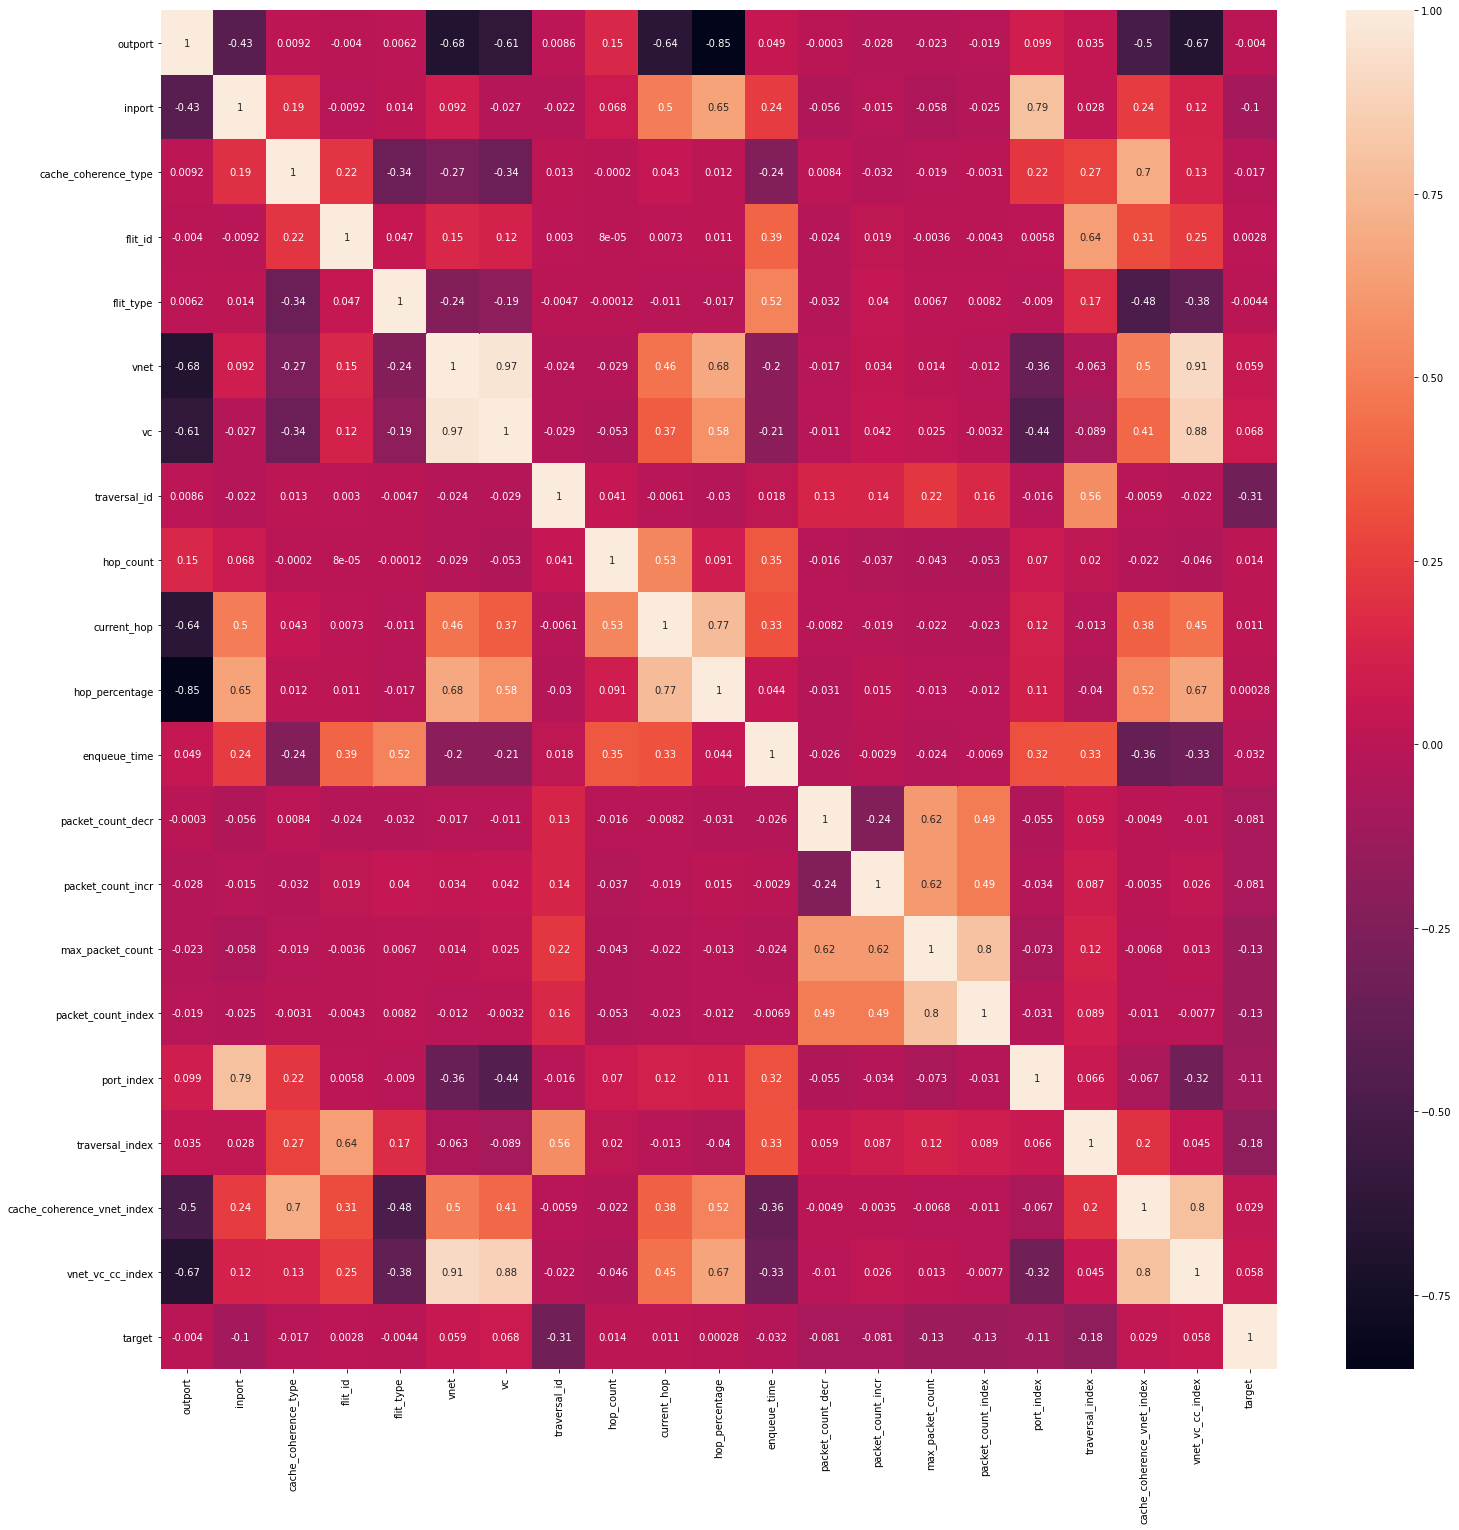

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

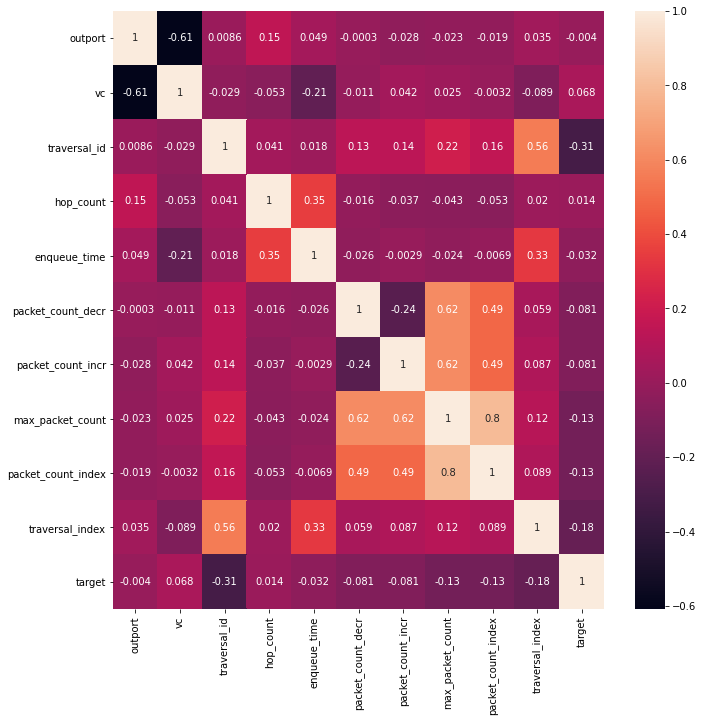

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

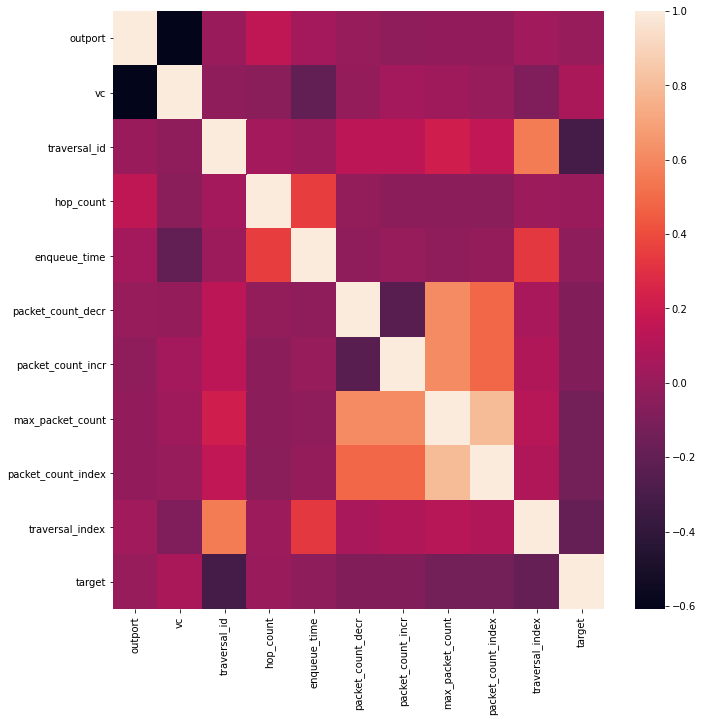

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.000,0.000000,0.666667,0.000000,0.337017,0.000000,0.337017,0.007287,0.000000
1,1.0,0.000,0.000000,0.666667,0.000000,0.320442,0.000000,0.320442,0.006929,0.000000
2,0.0,1.000,0.000000,0.666667,0.235294,0.314917,0.005525,0.320442,0.013738,0.000000
3,0.0,1.000,0.000000,0.666667,0.250000,0.309392,0.011050,0.320442,0.020308,0.000004
4,0.0,1.000,0.000000,0.666667,0.264706,0.303867,0.016575,0.320442,0.026640,0.000007
...,...,...,...,...,...,...,...,...,...,...
186321,0.5,0.000,0.999967,0.500000,0.220588,0.022099,0.038674,0.060773,0.004659,0.266666
186322,0.5,0.000,0.999967,0.500000,0.323529,0.016575,0.044199,0.060773,0.004181,0.399999
186323,0.5,0.000,0.999967,0.500000,0.426471,0.011050,0.049724,0.060773,0.003464,0.533333
186324,0.5,0.000,0.999967,0.500000,0.529412,0.005525,0.055249,0.060773,0.002509,1.000000


In [20]:
train_X[train_X.duplicated()].shape

(10, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.000,0.000000,0.666667,0.000000,0.357143,0.000000,0.357143,0.008306,0.000000
1,0.0,1.000,0.000000,0.666667,0.235294,0.351190,0.005952,0.357143,0.016473,0.000000
2,0.0,1.000,0.000000,0.666667,0.250000,0.345238,0.011905,0.357143,0.024363,0.000004
3,0.0,1.000,0.000000,0.666667,0.264706,0.339286,0.017857,0.357143,0.031977,0.000007
4,0.0,1.000,0.000000,0.666667,0.279412,0.333333,0.023810,0.357143,0.039313,0.000010
...,...,...,...,...,...,...,...,...,...,...
96698,0.5,0.000,0.999967,0.500000,0.220588,0.023810,0.005952,0.029762,0.001246,0.266666
96699,0.5,0.000,0.999967,0.500000,0.323529,0.017857,0.011905,0.029762,0.001523,0.399999
96700,0.5,0.000,0.999967,0.500000,0.426471,0.011905,0.017857,0.029762,0.001523,0.533333
96701,0.5,0.000,0.999967,0.500000,0.529412,0.005952,0.023810,0.029762,0.001246,1.000000


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    101863
1     84463
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  1971.594570
9     traversal_index   705.725915
1                  vc   291.395151
8  packet_count_index   260.923052
7    max_packet_count   203.930661
6   packet_count_incr   104.172694
5   packet_count_decr    99.778696
4        enqueue_time    13.200682
3           hop_count     4.185975
0             outport     0.558590


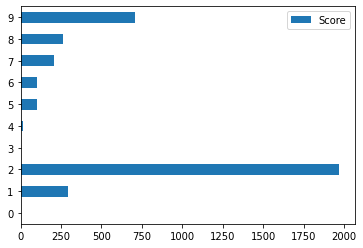

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 99.03875422547623
Test Prediction Score 98.46311475409836


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 81.32943135166437
Test Prediction Score 75.59290554330967
Test Prediction Score 79.28295916362471


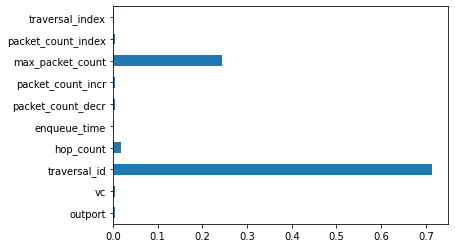

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

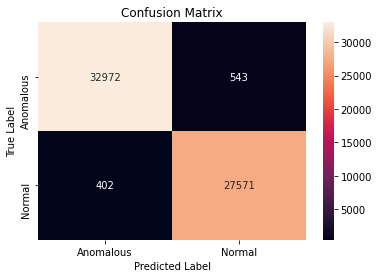

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     33515
           1       0.98      0.99      0.98     27973

    accuracy                           0.98     61488
   macro avg       0.98      0.98      0.98     61488
weighted avg       0.98      0.98      0.98     61488



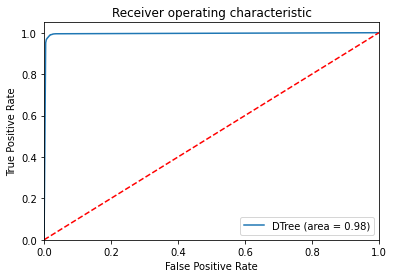

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r0l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99439273298194
Test Prediction Score 99.7804449648712


In [44]:
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
results = cross_val_score(xgbc, X_test, y_test, cv=kfold)
print (results*100)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[98.40624492 98.38998211 98.56887299 98.43877053 98.3574565  98.56887299
 98.81281509 98.65018702 98.56864021 98.68249837]
Accuracy: 98.54% (0.14%)


In [50]:
kfold = StratifiedKFold(n_splits=10, random_state=7, shuffle = True)
results = cross_val_score(xgbc, X_test, y_test, cv=kfold)
print (results*100)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[98.73150106 98.53634737 98.69897544 98.3737193  98.29240527 98.3574565
 98.65018702 98.66644983 98.56864021 98.43851659]
Accuracy: 98.53% (0.15%)


In [45]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 83.02948202227438
Test Prediction Score 76.56849538737856
Test Prediction Score 81.49075002843759


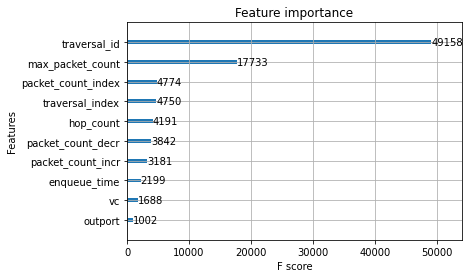

In [46]:
plot_importance(xgbc)
plt.show()

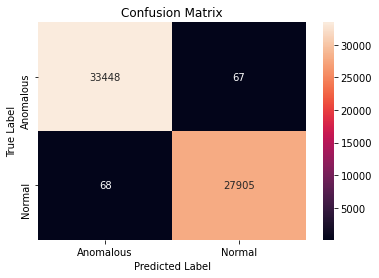

In [47]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [48]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33515
           1       1.00      1.00      1.00     27973

    accuracy                           1.00     61488
   macro avg       1.00      1.00      1.00     61488
weighted avg       1.00      1.00      1.00     61488



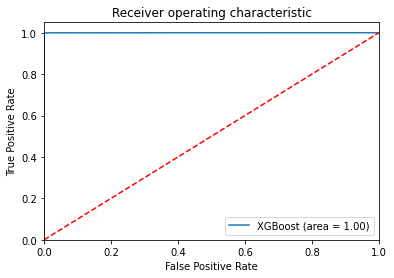

In [49]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()